## Método del codo y factor silueta

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

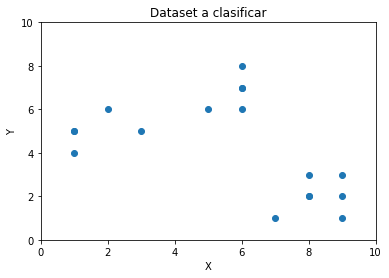

In [3]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x1, x2)
plt.show()

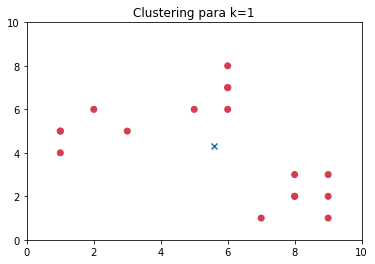

* Para K =  2 el promedio de la silueta es de : 0.6113424368705715
      - Para i =  1 La silueta del cluster vale: 0.7746251901389686
      - Para i =  2 La silueta del cluster vale: 0.49704450958269375


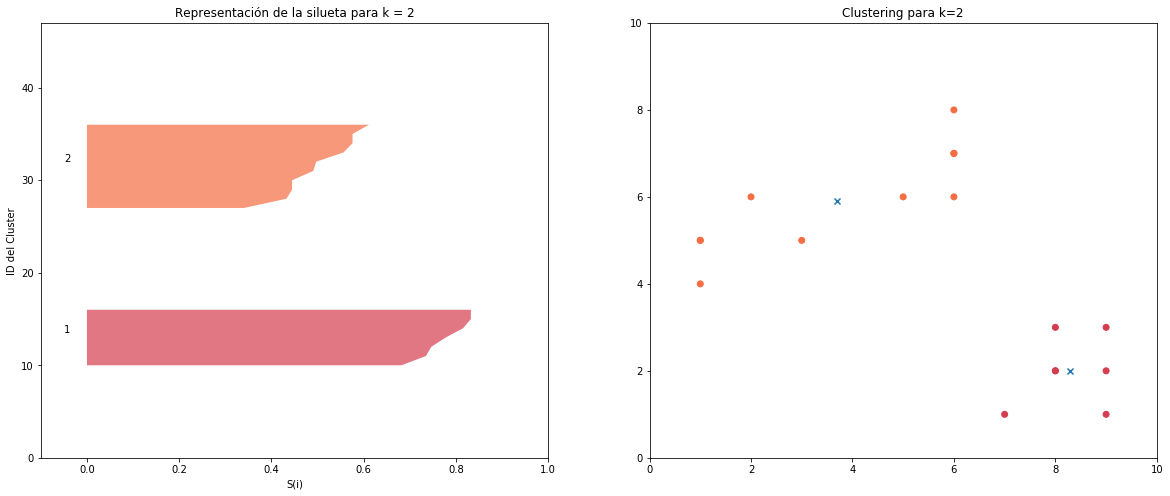

* Para K =  3 el promedio de la silueta es de : 0.7122079383287169
      - Para i =  1 La silueta del cluster vale: 0.7322200728725188
      - Para i =  2 La silueta del cluster vale: 0.7345257364682265
      - Para i =  3 La silueta del cluster vale: 0.6609508863896014


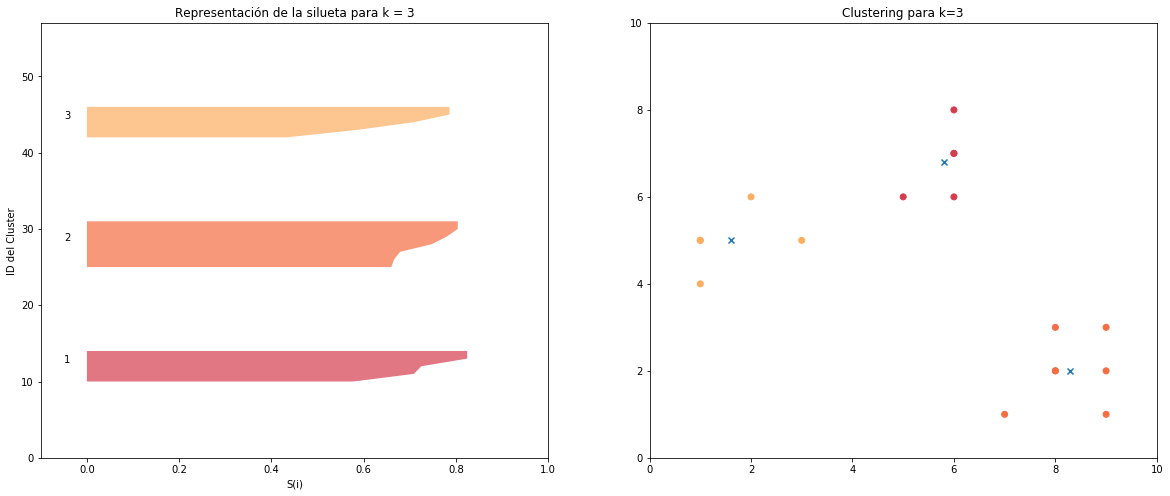

* Para K =  4 el promedio de la silueta es de : 0.6389948643127632
      - Para i =  1 La silueta del cluster vale: 0.655666655624379
      - Para i =  2 La silueta del cluster vale: 0.7345257364682265
      - Para i =  3 La silueta del cluster vale: 0.654458796162702
      - Para i =  4 La silueta del cluster vale: 0.24096929517637128


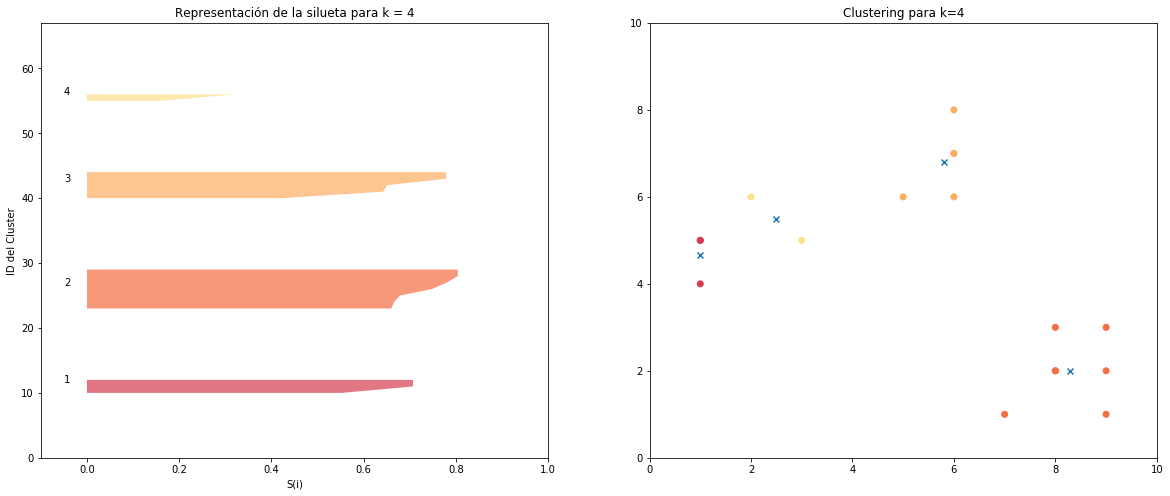

* Para K =  5 el promedio de la silueta es de : 0.46983374375750137
      - Para i =  1 La silueta del cluster vale: 0.37765685097302226
      - Para i =  2 La silueta del cluster vale: 0.654458796162702
      - Para i =  3 La silueta del cluster vale: 0.24096929517637128
      - Para i =  4 La silueta del cluster vale: 0.0
      - Para i =  5 La silueta del cluster vale: 0.655666655624379


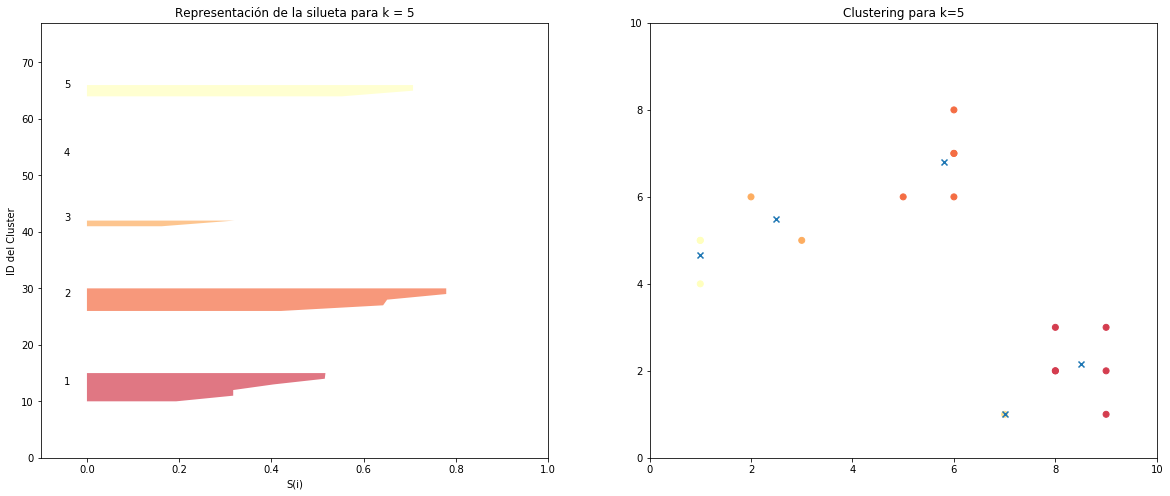

* Para K =  6 el promedio de la silueta es de : 0.44277529799306076
      - Para i =  1 La silueta del cluster vale: 0.30004208861569454
      - Para i =  2 La silueta del cluster vale: 0.24096929517637128
      - Para i =  3 La silueta del cluster vale: 0.3028895866899326
      - Para i =  4 La silueta del cluster vale: 0.654458796162702
      - Para i =  5 La silueta del cluster vale: 0.655666655624379
      - Para i =  6 La silueta del cluster vale: 0.0


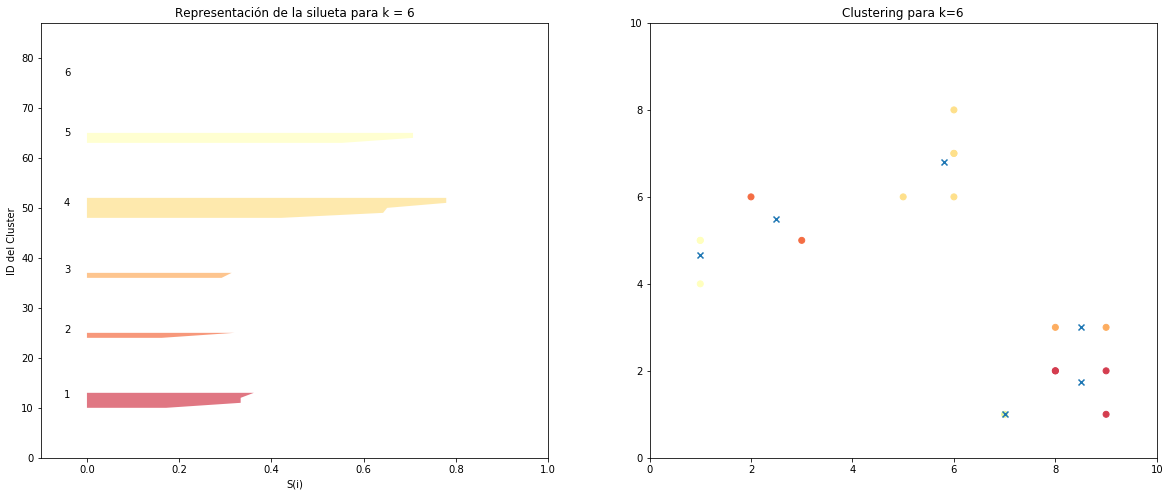

* Para K =  7 el promedio de la silueta es de : 0.3273165505598733
      - Para i =  1 La silueta del cluster vale: 0.263812295212263
      - Para i =  2 La silueta del cluster vale: 0.24096929517637128
      - Para i =  3 La silueta del cluster vale: 0.32995401797387514
      - Para i =  4 La silueta del cluster vale: 0.31700053499298475
      - Para i =  5 La silueta del cluster vale: 0.655666655624379
      - Para i =  6 La silueta del cluster vale: 0.0
      - Para i =  7 La silueta del cluster vale: 0.0


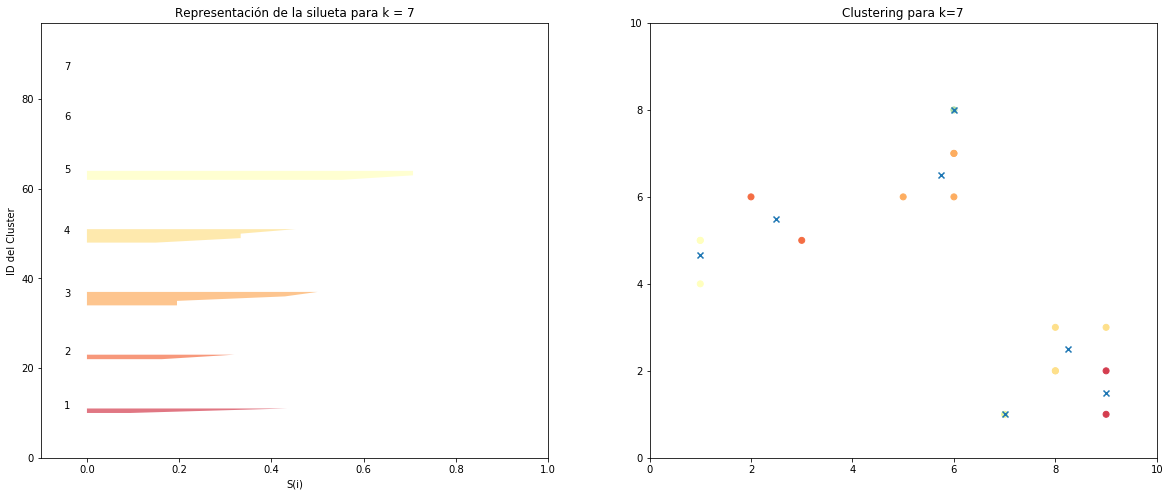

* Para K =  8 el promedio de la silueta es de : 0.3445627498105907
      - Para i =  1 La silueta del cluster vale: 0.0
      - Para i =  2 La silueta del cluster vale: 0.32882042637679976
      - Para i =  3 La silueta del cluster vale: 0.6152265411044983
      - Para i =  4 La silueta del cluster vale: 0.5237553814972481
      - Para i =  5 La silueta del cluster vale: 0.5664789734180768
      - Para i =  6 La silueta del cluster vale: 0.0
      - Para i =  7 La silueta del cluster vale: 0.027847735322324364
      - Para i =  8 La silueta del cluster vale: 0.0


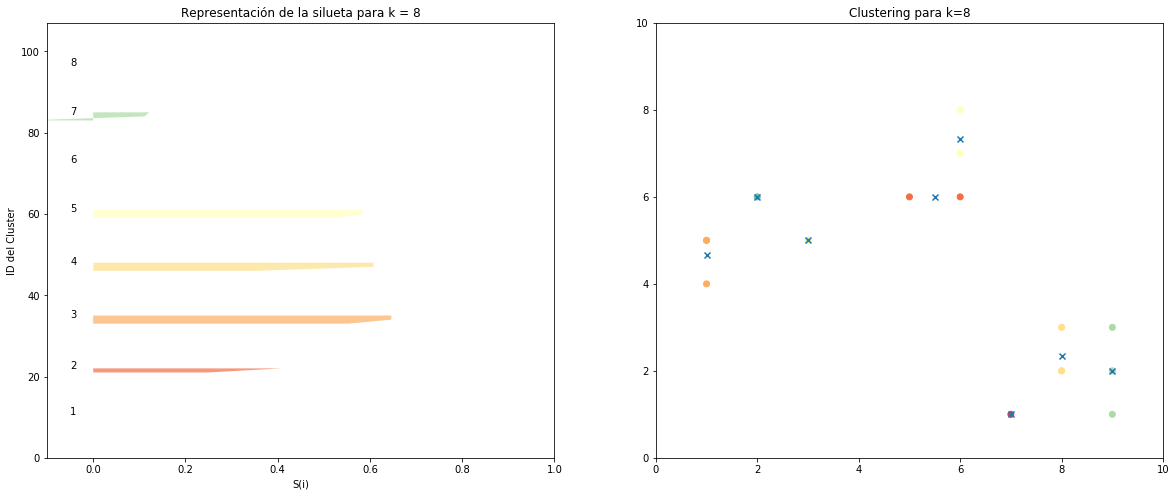

* Para K =  9 el promedio de la silueta es de : 0.33831071369622945
      - Para i =  1 La silueta del cluster vale: 0.6152265411044983
      - Para i =  2 La silueta del cluster vale: 0.14644660940672627
      - Para i =  3 La silueta del cluster vale: 0.32995401797387514
      - Para i =  4 La silueta del cluster vale: 0.14644660940672627
      - Para i =  5 La silueta del cluster vale: 0.0
      - Para i =  6 La silueta del cluster vale: 0.0
      - Para i =  7 La silueta del cluster vale: 0.0
      - Para i =  8 La silueta del cluster vale: 1.0
      - Para i =  9 La silueta del cluster vale: 0.0


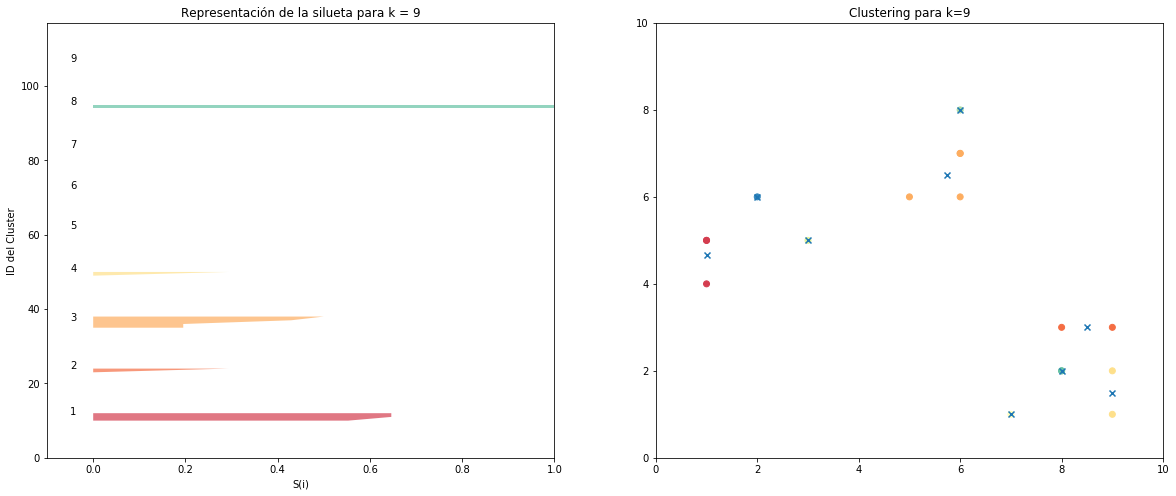

In [46]:
max_k = 10 # Máximo numero de cluster a crear
K = range(1, max_k)
ssw = []
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis  = 1))

    
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
        
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
                   
       
    ## Fabricaremos una silueta para cada cluster
    
    ## NO SE HACE SILUETA SI K = 1 O K < LEN(X)
    if 1<k<len(X):
        ##Crear sun subplot de una fila y 2 columnas
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)

        # El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        # En nuestro caso, ya controlamos q los valores estén entre -0.1 y 1

        axis1.set_xlim([-0.1, 1.0])

        # El número de clusters a insertar determinará el tamaño de cada barra
        # El coeficiente (n-clusters+1)*10 será el espacio en blanco que dejaremos ...
        # entre siluetas individuales de cada cluster para separarlas

        axis1.set_ylim([0, len(X) + (k+1)*10])

        silhouette_avg = silhouette_score(X, labels)
        print('* Para K = ', k, 'el promedio de la silueta es de :',silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)

        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster k
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("      - Para i = ", i+1, "La silueta del cluster vale:", np.mean(ith_cluster_sv))
            # Ordenamos descendentemente las siluetas de cluster I-ésimo
            ith_cluster_sv.sort()

            #Calculamos la silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size

            # Elegimos el color del cluster
            color = color_palette[i]

            # Pintamos la silueta del cluster i-ésimo

            axis1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_sv, facecolor = color,  alpha = 0.7)

            # Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5* ith_cluster_size, str(i+1))

            #Calculamos el nuevo y-lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 # dejamos vacias 10 posiciones sin muestra

        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")

        ## FIn de la representación de la silueta
    ## Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k=%s"%str(k))
    plt.scatter(x1, x2, c=label_color)
    plt.scatter(centers[0], centers[1],  marker = "x")
    plt.show()

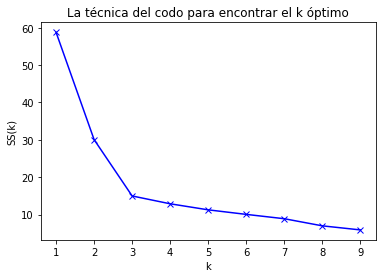

In [47]:
## Representación del codo
plt.plot(K, ssw, "bx-")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.xlabel("k")
plt.ylabel("SS(k)")
plt.show()

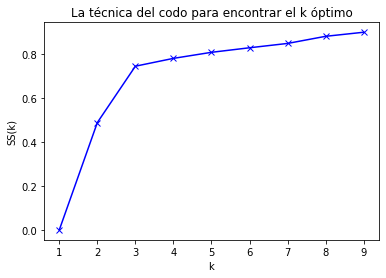

In [48]:
## Representación del codo normalizado
plt.plot(K, 1-ssw/sst, "bx-")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.xlabel("k")
plt.ylabel("SS(k)")
plt.show()

In [6]:
ssw_k

58.7809550536427